(12089, 785)
(12089,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log


9813
1949
[0.69314718 0.15301779 0.2008447  ... 0.08455243 0.08455426 0.08455609]


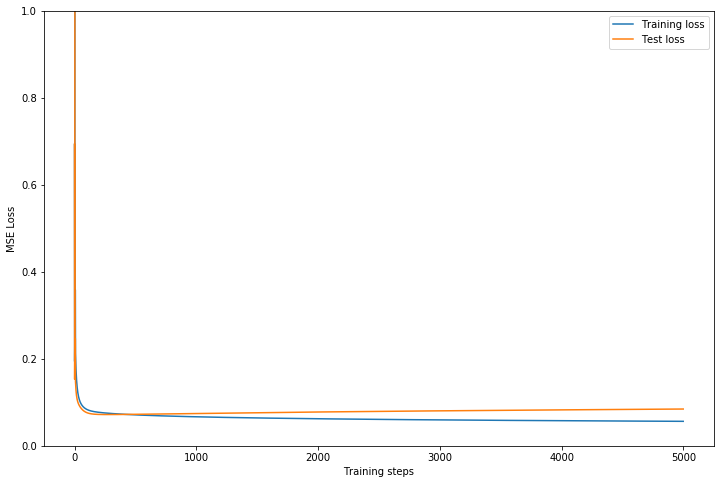

In [145]:
import mnist
import numpy as np
import matplotlib.pyplot as plt # Plotting library

#mnist.init()
X_train, Y_train, X_test, Y_test = mnist.load()

#using only images decipting a 2 or 3
X_train = X_train[(Y_train == 3) | (Y_train == 2)]
Y_train = Y_train[(Y_train == 3) | (Y_train == 2)]
Y_train = (Y_train == 2).astype(int)
ones = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X_train,ones), axis = 1)
print(X_train.shape)

X_test = X_test[(Y_test == 3) | (Y_test == 2)]
Y_test = Y_test[(Y_test == 3) | (Y_test == 2)]
Y_test = (Y_test == 2).astype(int)

print(Y_train.shape)
#Test sets
X_test_set = X_train[10000:12000];
Y_test_set = Y_train[10000:12000];

#for debugging purposes
X_train = X_train[0:10000];
Y_train = Y_train[0:10000];



#implementing gradient descent
weights = np.zeros(X_train[0].size)

m = 5000
learning_rate = 0.000001

def cross_entropy_loss_function(target, output_probability):
    N=target.size
    return -(np.dot(target,np.log(output_probability))+np.dot((1-target),np.log(1-output_probability)))/N

def values_guessed_correctly_percentage(probabilities_of_values, actual_values):
    VALUES_GUESSED=np.zeros(probabilities_of_values.size)
    correctly_guessed_numbers=0;
    for i in range(probabilities_of_values.size):
        if probabilities_of_values[i]<0.5:
            VALUES_GUESSED[i]=0
        else:
            VALUES_GUESSED[i]=1
        if VALUES_GUESSED[i]==actual_values[i]:
            correctly_guessed_numbers+=1
    print(correctly_guessed_numbers)

TRAIN_LOSS = np.zeros(m)
TEST_LOSS = np.zeros(m)
STEP = np.zeros(m)

for i in range(0,m): #Må ordne med validation set også (nå har vi test set og training set), legge inn early stopping?
    probability = 1 / (1 + np.exp(np.dot(X_train,weights))) #mulig pluss/minus-feil
    test_set_probability = 1 / (1 + np.exp(np.dot(X_test_set,weights)))
    
    TRAIN_LOSS[i]=cross_entropy_loss_function(Y_train,probability)
    TEST_LOSS[i]=cross_entropy_loss_function(Y_test_set,test_set_probability)
    STEP[i]=i
    
    error = Y_train - probability
    weights = weights - learning_rate * np.dot(error,X_train)/500

values_guessed_correctly_percentage(probability,Y_train)
values_guessed_correctly_percentage(test_set_probability,Y_test_set)

#print(LOSS)
#print(Y_train)
#print(probability)
#print(TRAIN_LOSS)
print(TEST_LOSS)

plt.figure(figsize=(12, 8 ))
plt.ylim([0, 1])
plt.xlabel("Training steps")
plt.ylabel("MSE Loss")
plt.plot(STEP, TRAIN_LOSS, label="Training loss")
plt.plot(STEP, TEST_LOSS, label="Test loss")
#plt.plot(TRAINING_STEP, VAL_LOSS, label="Validation loss")
plt.legend() # Shows graph labels

plt.show()